In [17]:
#Importing packages
#
# You can delete whatever package(s) you want..
#
# import os
# import json
# import time
# import requests
import math as m
import pandas as pd
import numpy as np
import koios_python
import matplotlib.pyplot as plt



# Because most of my data sets I have made can have up to 30+ columns and 20+ rows
# code below will increase pandas defaults for max rows 
# and columns that you can display in a Juptyer Notebook
pd.options.display.max_columns = 60
pd.options.display.max_rows = 1000

## NoteBook 1


In this Notebook we will be going over how to use the koios_python library in various scenarios a developer may face. The first thing we need to do is

create a class instance for koios_python and choose what network we would like to use for our queries, in this tutorial we will use mainnet but the 

library supports all the various developer networks available including preview, preprod, guild, and mainnet.

In [7]:
# create a koios server object with network set to mainnet (default network if not set by user is mainnet)
# koios_python.URLs(network="mainnet")
kp_mainnet = koios_python.URLs()

# let's check the current tip of the mainnet
current_tip = kp_mainnet.get_tip()

# Let's make it into a pandas dataframe and display it
current_tip_df = pd.DataFrame(current_tip)
current_tip_df

,hash,epoch_no,abs_slot,epoch_slot,block_no,block_time
0,7cd98728840ab73a0fceeb1cc65a82a0aea9fa58db46b0...,386,81748940,360140,8250215,1673315231


Depending on what it is your try to build it is common to need the current tip from the blockchain and KOIOS API has a endpoint made just for it. The tip of the block_chain is the latest block made in the current epoch which is epoch 386. The KOIOS API endpoint we are querying is in the network category and can be found in their documentation [here](https://api.koios.rest/#get-/tip).

As you can see from running the code cell above we can easily obtain a object containing the JSON response for querying the tip of the blockchain that gives us some nice information that can be used in a application such as block hash, epoch number, epoch slot number, absolute slot number (this goes back to genesis), bloch height number, and a unix timestamp that can be used to convert to human readable times easily.

I would like to show a quick graph of the distribution of blocks made by Cardano Node versions run by validators (stake-pools) and check to make sure we have most Stake Pool operators on the correct node version.

In order to do this we can firstly query the Epoch Parameters KOIOS API endpoint to see what is the current minimum blockchain protocol version needed. Then we will query the Epoch Block Protocols endpoint to see the distribution of blocks made by various versions.


In [10]:
# Let's get the last epoch's protocol parameters
current_epoch_params = pd.DataFrame(kp_mainnet.get_epoch_params(current_tip_df['epoch_no'][0]))
current_epoch_params

,epoch_no,min_fee_a,min_fee_b,max_block_size,max_tx_size,max_bh_size,key_deposit,pool_deposit,max_epoch,optimal_pool_count,influence,monetary_expand_rate,treasury_growth_rate,decentralisation,extra_entropy,protocol_major,protocol_minor,min_utxo_value,min_pool_cost,nonce,block_hash,cost_models,price_mem,price_step,max_tx_ex_mem,max_tx_ex_steps,max_block_ex_mem,max_block_ex_steps,max_val_size,collateral_percent,max_collateral_inputs,coins_per_utxo_size
0,386,44,155381,90112,16384,1100,2000000,500000000,18,500,0.3,0.003,0.2,0,None,7,0,4310,340000000,95c01e6b4d478a5f64324c77aea4d9a9685986d9d75e28...,3cb6055ac4af52ce4c48920c9046b1dff20acda7fc5877...,"{""PlutusV1"": {""bData-cpu-arguments"": 1000, ""iD...",0.0577,0.000072,14000000,10000000000,62000000,40000000000,5000,150,3,4310


In [14]:
# Now we can check the protocol major and minor versions needed to mint a block on the mainnet
print("As of epoch {}, the current minimum node version needed to produce a block is ({}.{})"
      .format(current_tip_df['epoch_no'][0], current_epoch_params['protocol_major'][0],
              current_epoch_params['protocol_minor'][0]))


As of epoch 386, the current minimum node version needed to produced blocks is (7.0)


([<matplotlib.patches.Wedge at 0x7f83911bbdf0>,
 [Text(0.977974808783069, 0.5035526520491376, '7'),
  Text(-0.977974832356069, -0.5035526062668318, '8')])

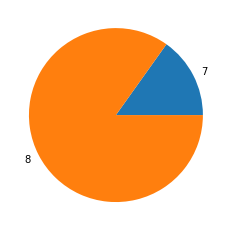

In [22]:
# Now let's look at the current epoch's blocks distribution based on node version
block_protocol_dist = pd.DataFrame(kp_mainnet.get_epoch_block_protocols(current_tip_df['epoch_no'][0]))


# Let's display the distribution as a pie chart
plt.pie(block_protocol_dist['blocks'], labels=block_protocol_dist['proto_major'])

### Let's go over some use case examples for koios_python

**Native Assets:**

With Koios Python we can access useful data about various assets on the Cardano blockchain in a fairly simple manner.



How many wallets hold a specific asset or token?

Pool information

Pool's history?

How many pools are there?